In [1]:
import sklearn
import math
import numpy as np
from sklearn import linear_model, metrics, datasets
from mylibs import stats as st
from mylibs import mymetrics as mt
from mylibs import linear_model as lm
from mylibs import resample as rs
import importlib
importlib.reload(st)
importlib.reload(mt)
importlib.reload(lm)
importlib.reload(rs)

<module 'mylibs.resample' from 'C:\\Users\\Lucivan\\Dropbox\\UFC\\2018.1 - 7º Semestre\\Aprendizado de Máquina\\Listas\\Lista 3\\mylibs\\resample.py'>

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

## stats.py

### mean(x)

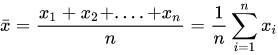

In [3]:
np.mean(y)

152.13348416289594

In [4]:
st.mean(y)

152.13348416289594

### stdev(x)

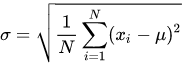

In [5]:
np.std(y)

77.00574586945044

In [6]:
st.stdev(y)

77.00574586945044

### var(y)

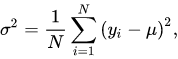

In [7]:
np.var(y)

5929.884896910383

In [8]:
st.var(y)

5929.884896910383

## metrics.py

### mse(y_true, y_pred)

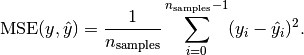

In [9]:
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
metrics.mean_squared_error(y_true, y_pred)

0.375

In [10]:
mt.mse(y_true, y_pred)

0.375

### rmse(y_true, y_pred)

In [11]:
mt.rmse(y_true, y_pred)

0.6123724356957945

### mae(y_true, y_pred)

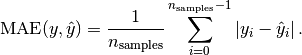

In [12]:
metrics.mean_absolute_error(y_true, y_pred)

0.5

In [13]:
mt.mae(y_true, y_pred)

0.5

## linear_model.py (SimpleLinearRegression)

$ \beta_1 = \frac{ \sum_{i=1}^{n} (x_i - mean(x)) \times (y_i - mean(y))}{\sum_{i=1}^{n} (x_i - mean(x))^2} $

$ \beta_0 = mean(y) - \beta_1 \times mean(x) $

In [14]:
X2 = np.array([[1400], [1700], [1875], [1100], [1550], [2350], [2450], [1225], [1700]])
y2 = np.array([245000, 312000, 308000, 199000, 219000, 405000, 324000, 319000, 255000])
model = linear_model.LinearRegression()
model.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
print(model.coef_)
print(model.intercept_)

[98.34319527]
119603.55029585795


In [16]:
mymodel = lm.SimpleLinearRegression()

In [17]:
mymodel.fit(X2, y2)

In [18]:
print(mymodel.b1)
print(mymodel.b0)

[98.34319527]
119603.55029585795


## 2. Crie um Jupyter Notebook e use as bibliotecas criadas na Questão 1 para fazer o que se pede:

#### a) Represente os dados a seguir:
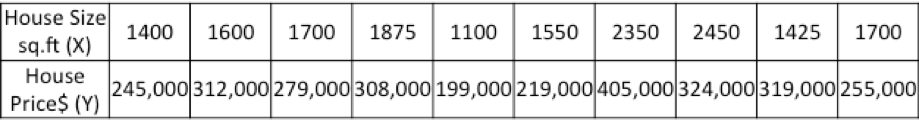

In [19]:
X = np.array([[1400],[1600],[1700],[1875],[1100],[1550],[2350],[2450],[1425],[1700]])
X

array([[1400],
       [1600],
       [1700],
       [1875],
       [1100],
       [1550],
       [2350],
       [2450],
       [1425],
       [1700]])

In [20]:
y = np.array([245000, 312000, 279000, 308000, 199000, 210000, 405000, 324000, 319000, 255000])
y

array([245000, 312000, 279000, 308000, 199000, 210000, 405000, 324000,
       319000, 255000])

#### b) Calcule média, desvio padrão e variância de X.

In [21]:
# my libs
print(st.mean(X))
print(st.stdev(X))
print(st.var(X))

1715.0
396.42149285829595
157150.0


In [22]:
# mean
print(np.mean(X))
print(np.std(X))
print(np.var(X))

1715.0
396.42149285829595
157150.0


#### c) Divida os dados X, y para 70% de treino e 30% de teste. O resultado deve estar nas variáveis: X_train, y_train, X_test, y_test.

* Dicas: 
* X_train = X[idx_train], onde idx_train é um array com os índices dos dados de treino.
* y_train = y[idx_train]
* X_test = X[idx_test]
* y_test = y[idx_test]

In [25]:
indice = math.ceil(len(X) * 0.7) # 70% dos dados
X_train = X[:indice] # pegar os 70% dos dados no conjunto X e seus valores no y
y_train = y[:indice]

X_test = X[indice:] # pegar os 30% dos dados no conjunto X (os últimos valores) e seus valores no y
y_test = y[indice:]

In [26]:
idx_train, idx_test = rs.split_train_test(X.size, 0.7,0)
X_train = X[idx_train] # pegar os 70% dos dados no conjunto X e seus valores no y
y_train = y[idx_train]

X_test = X[idx_test] # pegar os 30% dos dados no conjunto X (os últimos valores) e seus valores no y
y_test = y[idx_test]

In [27]:
print("X_train: ")
print(X_train)
print("\ny_train: ")
print(y_train)
print("\nX_test: ")
print(X_test)
print("\ny_test: ")
print(y_test)

X_train: 
[[1700]
 [1425]
 [1100]
 [1700]
 [1600]
 [2350]
 [2450]]

y_train: 
[279000 319000 199000 255000 312000 405000 324000]

X_test: 
[[1875]
 [1400]
 [1550]]

y_test: 
[308000 245000 210000]


####  d) Crie um modelo de (1) SimpleLinearRegression (sua implementação) e outro modelo usando (2) LinearRegression do Scikit Learn.

In [28]:
model = linear_model.LinearRegression()

In [29]:
mymodel = lm.SimpleLinearRegression()

####  e) Treine os modelos com os dados de treino (X_train, y_train).

In [30]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
mymodel.fit(X_train, y_train)

####  f) Faça as predições para os modelos usando os dados de teste (X_test).

In [32]:
y_pred = model.predict(X_test)
y_pred

array([310458.49752129, 262834.11719842, 277873.39519512])

In [33]:
y_my_pred = mymodel.predict(X_test);
y_my_pred

array([310458.49752129, 262834.11719842, 277873.39519512])

####  g) Calcule as métricas MSE, RMSE e MAE para avaliar os modelos criados comparando os rótulos dos dados de teste (y_test) com os dados preditos (y_pred).

In [34]:
# my libs
print(mt.mse(y_test, y_pred))
print(mt.rmse(y_test, y_pred))
print(mt.mae(y_test, y_pred))

1643632573.874031
40541.73866367883
29388.66997161137


In [35]:
print(metrics.mean_squared_error(y_test, y_pred))
print(math.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(metrics.mean_absolute_error(y_test, y_pred))

1643632573.874031
40541.73866367883
29388.66997161137


In [36]:
# my libs using y_my_pred
print(mt.mse(y_test, y_my_pred))
print(mt.rmse(y_test, y_my_pred))
print(mt.mae(y_test, y_my_pred))

1643632573.8740318
40541.73866367884
29388.66997161139


In [37]:
# usgin y_my_pred
print(mt.mse(y_test, y_my_pred))
print(mt.rmse(y_test, y_my_pred))
print(mt.mae(y_test, y_my_pred))

1643632573.8740318
40541.73866367884
29388.66997161139
